In [8]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 17.5 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np

from sklearn.neighbors import BallTree
from io import StringIO

import matplotlib.pyplot as plt
import contextily as ctx

In [10]:
osm_nodes = """
node_id,lat,lon
12098983476,20.9936147,105.8691445
10139175528,20.9978003,105.8677807
10139155844,20.9970878,105.8650519
10139155843,20.9968158,105.8642811
10137756340,20.9969627,105.863477
11921518186,20.996425,105.8632007
10137745289,20.9968971,105.8624423
10137277802,20.9971109,105.8622828
10137277803,20.9975218,105.862242
10137277803,20.9975218,105.862242
10137756432,20.9986759,105.8616954
10137756429,20.9993973,105.8616065
10137756419,20.9998159,105.8615625
5709913465,21.0004044,105.8616332
10137756437,21.0004586,105.8616273
10137277782,21.0010828,105.8615593
10137277811,21.0015811,105.8617998
10137277811,21.0015811,105.8617998
10137277781,21.001974,105.8614674
10137277812,21.0023623,105.8617161
10137277878,21.0033766,105.8612062
10137277913,21.0037451,105.8616963
10137277877,21.0043194,105.861102
10137277755,21.00527,105.8611307
10137277756,21.0056546,105.8610857
10137277761,21.0072241,105.8609129
10137277897,21.007677,105.8608898
10137277895,21.007774,105.8608405
10137277893,21.0080339,105.8607965
10137277846,21.008712,105.8606159
8179214864,21.0097957,105.8605807
10142034337,21.0101872,105.8603658
10142034342,21.0104519,105.8601554
10142034340,21.0108323,105.8598585
8179214862,21.0109959,105.859626
8179214861,21.0113663,105.8593295
8179214861,21.0113663,105.8593295
8179214860,21.0117578,105.8590199
8179214859,21.011965,105.8588551
8179214859,21.011965,105.8588551
8971506809,21.0123001,105.8585886
8179214857,21.0123871,105.8585194
8971506808,21.0124844,105.858442
8179214823,21.0126394,105.8583187
8189781648,21.0134359,105.857819
8179214852,21.0135071,105.8576872
8971506805,21.0137953,105.8575269
8179214826,21.0142423,105.8572634
8349804712,21.0153205,105.8567775
8349804710,21.0156499,105.8565877
8189781582,21.0158835,105.8564531
8189781603,21.0160716,105.8562876
8349804732,21.0162475,105.8561477
8349804732,21.0162475,105.8561477
8349804730,21.0167602,105.8558631
8349804730,21.0167602,105.8558631
8184202775,21.017076,105.8556878
11217231937,21.0171929,105.8556754
8184202826,21.0173799,105.855518
8184202826,21.0173799,105.855518
8189781525,21.0182295,105.8551379
8189781525,21.0182295,105.8551379
8189781527,21.0182917,105.8551591
10130015955,21.0184539,105.8549403
8189781484,21.0184871,105.8551573
6689486564,21.0194507,105.8554633
11217954549,21.0199677,105.8554377
9965357129,21.020931,105.8557786
9965357129,21.020931,105.8557786
9965357127,21.0212225,105.8558784
8184202890,21.021625,105.8559501
8184202925,21.0224385,105.8563002
11455538972,21.023773,105.8569501
6662487544,21.0239246,105.8568847
8184606234,21.0244243,105.8566791
8184202947,21.0248162,105.8552255
"""

osm_df = pd.read_csv(StringIO(osm_nodes))
osm_df.head(5)

,node_id,lat,lon
0,12098983476,20.993615,105.869145
1,10139175528,20.997800,105.867781
2,10139155844,20.997088,105.865052
3,10139155843,20.996816,105.864281
4,10137756340,20.996963,105.863477


In [11]:
waypoints = """
lat,lon
20.99380292929709,105.86917002685368
20.997687689960003,105.86768458597362
20.996925942599773,105.86498946882784
20.996015165001154,105.86470138281584
20.996743217110634,105.86324779316783
20.996718993410468,105.86322952061892
20.996967684477568,105.8623790089041
20.9970816783607,105.86232922039926
20.997441010549664,105.86215018294752
20.997499097138643,105.86212361231446
20.998699720948935,105.86128693073988
20.99921654909849,105.86114360019565
20.999742345884442,105.86152397096157
21.000402756035328,105.8617333509028
21.000680197030306,105.86168549023569
21.00089829415083,105.861646682024
21.00143725052476,105.86161240004003
21.00156524218619,105.86155976168811
21.00209497846663,105.86165439337492
21.0025196056813,105.86161902174354
21.003400878980756,105.86146102286875
21.003674380481243,105.86145616136491
21.004416681826115,105.8612774591893
21.005370626226068,105.86113153025508
21.005781339481473,105.86111937649548
21.007227301597595,105.86098895408213
21.007634326815605,105.86094779893756
21.007810682058334,105.86090421304107
21.008099941536784,105.86083992384374
21.008596904575825,105.86062828078866
21.009812280535698,105.86053691804409
21.010129367932677,105.86023500189185
21.01041971705854,105.86016677320004
21.01080972701311,105.85985907353461
21.01095926016569,105.85969076491892
21.011259416118264,105.85944433696568
21.011346504092216,105.85940510965884
21.011676751077175,105.85916270501912
21.011953856796026,105.85891384631395
21.01204438135028,105.85887135006487
21.01231662556529,105.85866163484752
21.01241779513657,105.85853590629995
21.012532291933894,105.85848284885287
21.012669587507844,105.858314037323
21.013407362625003,105.85781313478947
21.01352697238326,105.85770609788597
21.013804832473397,105.85749235935509
21.014267094433308,105.85731114260852
21.01532220840454,105.85676489397883
21.01555623114109,105.85659666918218
21.015892261639237,105.8564024604857
21.016061743721366,105.85628226399422
21.01617875508964,105.85621185600758
21.0162930842489,105.8561619836837
21.016689715906978,105.85595067590475
21.01682365871966,105.85587750189006
21.01703488267958,105.85576174780726
21.017212914302945,105.85567315109074
21.0177471768111,105.85540333762765
21.017785063013434,105.85537173785269
21.017975751310587,105.8552557323128
21.01816996000707,105.85519873537123
21.018310524523258,105.85515246726573
21.01841177791357,105.85496814921498
21.018778486177325,105.85527040064335
21.019544089213014,105.85553015582263
21.0200266353786,105.85546620190144
21.02071713656187,105.85581463761628
21.020815959200263,105.85583324544132
21.02116657420993,105.85585964843631
21.02161467075348,105.85594899952412
21.02231447584927,105.85626156069338
21.02375398389995,105.85683069191873
21.023838305845857,105.85686530917883
21.02445504628122,105.85657403804362
21.024858048185706,105.85518247447908
"""

gpx_df = pd.read_csv(StringIO(waypoints))
gpx_df.head(5)

,lat,lon
0,20.993803,105.869170
1,20.997688,105.867685
2,20.996926,105.864989
3,20.996015,105.864701
4,20.996743,105.863248


In [14]:
# Convert coordinates to radians
osm_coords = np.deg2rad(osm_df[['lat', 'lon']])
gpx_coords = np.deg2rad(gpx_df[['lat', 'lon']])

# Create a BallTree for nearest neighbor search
tree = BallTree(osm_coords, metric='haversine')

# Find the nearest neighbors in OSM data
distances, indices = tree.query(gpx_coords, k=1)

# Add the results to the DataFrame
gpx_df['nearest_index'] = indices.flatten()
gpx_df['distance_meters'] = distances.flatten() * 6371000 # Earth's radius in meters

# Extract and assign the matched OSM node details
gpx_df[[
    'node_id',
    'node_lat',
    'node_lon',
]] = osm_df.iloc[gpx_df['nearest_index']][[
    'node_id',
    'lat',
    'lon',
]].values

gpx_df['node_id'] = gpx_df['node_id'].apply(lambda x: f'{int(x)}')
gpx_df = gpx_df.drop('nearest_index', axis=1)

gpx_df.head(5)

,lat,lon,distance_meters,node_id,node_lat,node_lon
0,20.993803,105.869170,21.097241,12098983476,20.993615,105.869145
1,20.997688,105.867685,16.010822,10139175528,20.997800,105.867781
2,20.996926,105.864989,19.129095,10139155844,20.997088,105.865052
3,20.996015,105.864701,99.143001,10139155843,20.996816,105.864281
4,20.996743,105.863248,34.085081,10137756340,20.996963,105.863477


In [15]:
gpx_df['distance_meters'].describe()

,distance_meters
count,76.000000
mean,15.126791
std,14.932807
min,1.154226
25%,6.392748
50%,10.316966
75%,20.414492
max,99.143001


In [16]:
gpx_df['node_id'].nunique()

67

In [19]:
gpx_df.drop_duplicates(subset=['lat', 'lon']).shape[0]

76

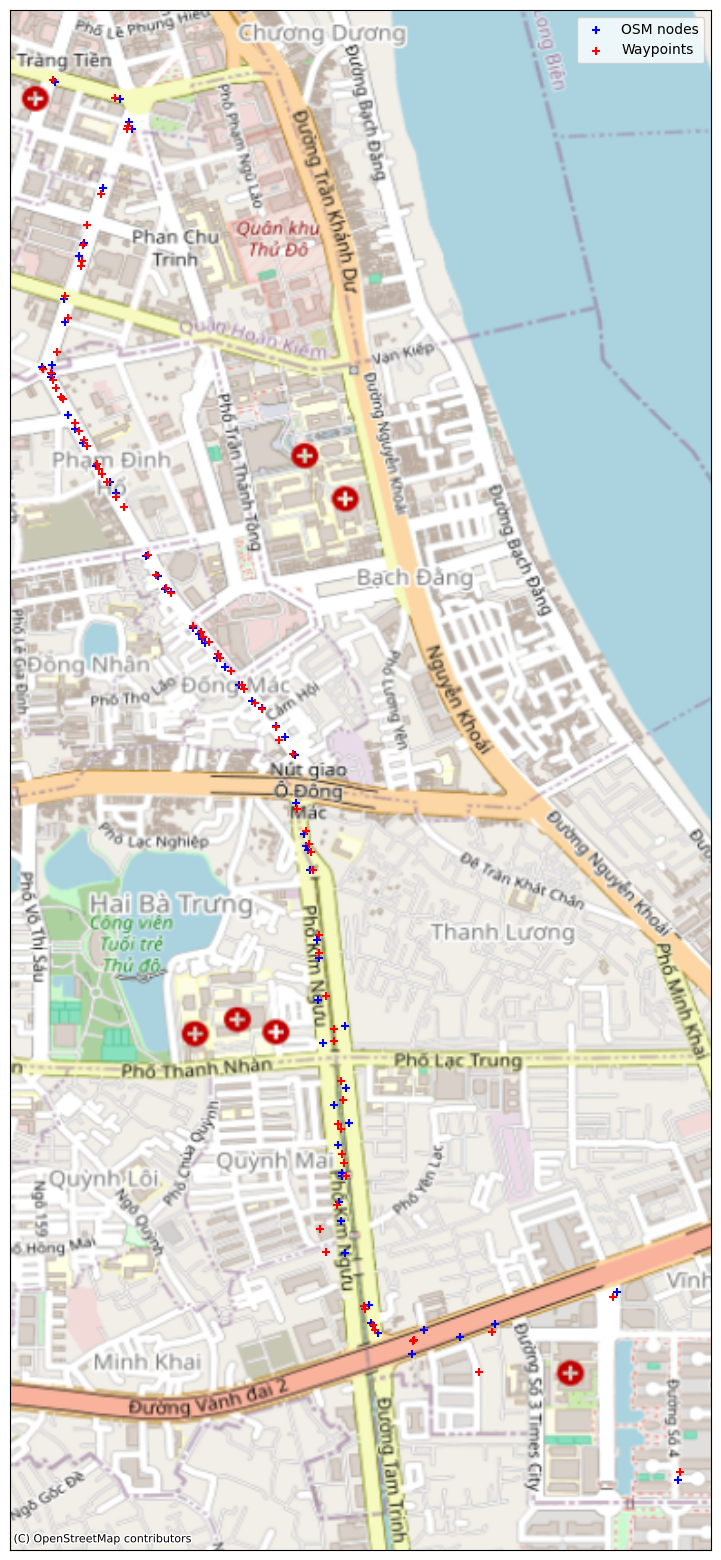

In [20]:
def plot(df):
    plt.figure(figsize=(30, 20))
    plt.scatter(df['node_lon'], df['node_lat'], color='blue', marker='+', label='OSM nodes')
    plt.scatter(df['lon'], df['lat'], color='red', marker='+', label='Waypoints')
    ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    plt.legend()
    plt.xticks([], [])
    plt.yticks([], [])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    plt.show()

plot(gpx_df)